# Programming Assignment B

*Forest Fire*

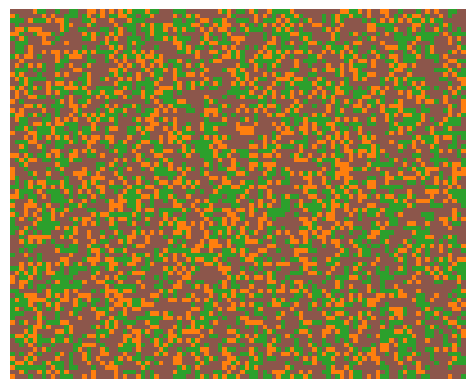

KeyboardInterrupt: 

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from IPython.display import clear_output

import time
from enum import Enum

States = Enum('States', [('Ashes', 0.55), ('Tree', 0.25), ('Fire', 0.15)])

# Initialize grid
# grid = np.random.choice([States.Ashes.value, States.Tree.value, States.Fire.value], size=(82, 101))
grid = np.full((82, 101), States.Ashes.value)

def neighborhood(grid, x, y):
    return [
        grid[x, y - 1],
        grid[(x + 1) % grid.shape[0], y],
        grid[x, (y + 1) % grid.shape[1]],
        grid[x - 1, y]
    ]


def update(grid, p, f, q):
    new_grid = grid.copy()

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):

            old_state = States(grid[i, j])
            
            if old_state == States.Fire:
                new_grid[i, j] = States.Ashes.value

            elif old_state == States.Ashes:
                if (
                    rand() < p  # spontaneous growth
                    or (rand() < q and States.Tree.value in neighborhood(grid, i, j))  # induced growth
                ):
                    new_grid[i, j] = States.Tree.value

            else:  # old_state == States.Tree
                if (
                    rand() < f  # spontaneous fire
                    or States.Fire.value in neighborhood(grid, i, j)  # induced fire
                ):
                    new_grid[i, j] = States.Fire.value

    return new_grid


for _ in range(500):
    clear_output(wait=True)
    plt.imshow(grid, cmap='tab10', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    grid = update(grid, 0.2, 0.2, 0.5)
    time.sleep(1)